In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
csv_path = "/content/drive/MyDrive/AI/stores_sales_forecasting.csv"  # update path if needed
df = pd.read_csv(csv_path, encoding="latin1")

In [8]:
print("Original Shape:", df.shape)
print(df.info())
print(df.describe())


Original Shape: (2121, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-n

In [9]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

In [10]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [11]:
# Apply to multiple numeric columns
numeric_cols = ["Sales", "Quantity", "Discount", "Profit"]


In [12]:
# Detect outliers for each column
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {outliers.shape[0]} rows")

Outliers in Sales: 164 rows
Outliers in Quantity: 39 rows
Outliers in Discount: 0 rows
Outliers in Profit: 407 rows


In [13]:
# Remove outliers column by column
df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print("Cleaned Shape:", df_cleaned.shape)


Cleaned Shape: (1597, 21)


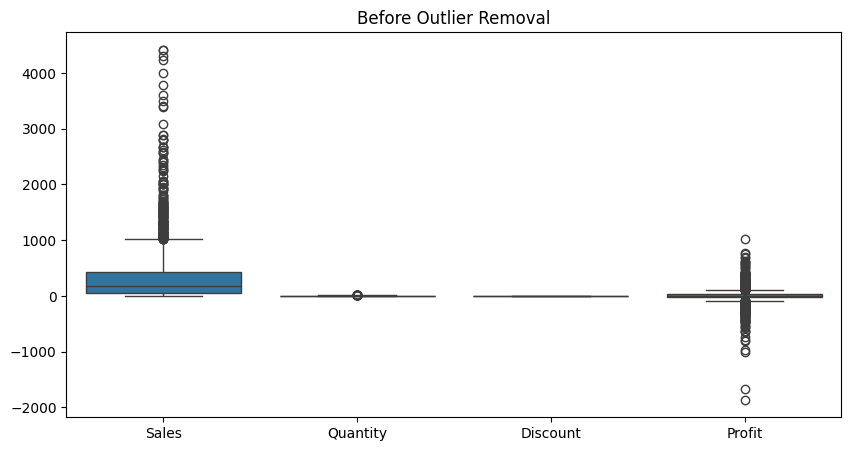

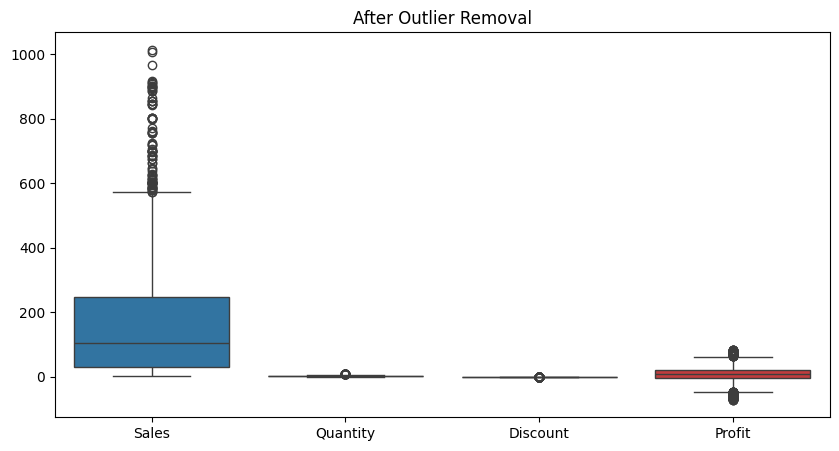

In [14]:
# -----------------------------
# Visualization Before & After
# -----------------------------
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.title("Before Outlier Removal")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("After Outlier Removal")
plt.show()

# Save cleaned dataset
df_cleaned.to_csv("stores_sales_forecasting_outlier_removed.csv", index=False)